In [35]:
import sys

# print python version
print(sys.version)

3.13.9 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 19:09:58) [MSC v.1929 64 bit (AMD64)]



## 2. Perform Calendar Calculations "in Your Head"

Which day of week was the 7th June 1987?

It was **TODO: put your answer here, when you implement the functions below.**

Calendar calculations are actually very simple to perform and can be learned in less than 30 minutes. Instead learning how to perform them "in your head" you will need to implement them within the Jupyter notebook you created above.

### 2.1 Calculate the Year code (Y)

Create a function that will calculate the year code (Y).

Procedure: Take the last two digits of the year, divide by 4 and remove the remainder. Add the number to the last two digits of the year:

* For dates in the 1700s, add 4.
* For dates in the 1800s, add 2.
* For dates in the 1900s, add 0.
* For dates in the 2000s, add 6.
* For dates in the 2100s, add 4.

> For example, year 1989: `89 / 4 = 22` and `22 + 89 + 0 = 111 = Y`

In [36]:
def year_code(year):
    # Get the last two digits of the year
    last_two_digits = year % 100
    # Divide by 4 and remove the remainder
    div_by_4 = last_two_digits // 4
    # Determine the century code
    century_code = 0
    if 1700 <= year < 1800:
        century_code = 4
    elif 1800 <= year < 1900:
        century_code = 2
    elif 1900 <= year < 2000:
        century_code = 0
    elif 2000 <= year < 2100:
        century_code = 6
    elif 2100 <= year < 2200:
        century_code = 4
    # Calculate the year code
    Y = last_two_digits + div_by_4 + century_code
    return Y

### 2.2 Select the Month code (M)

Create a function that will calculate the month code (M). Get the month code from the following lookup table (use an appropriate structure to store lookup tables):

|Month|Code|
|---|---|
|January     | 1 or 0 (for a leap year) |
|February    | 4 or 3 (for a leap year) |
|March       | 4 |
|April       | 0 |
|May         | 2 |
|June        | 5 |
|July        | 0 |
|August      | 3 |
|September   | 6 |
|October     | 1 |
|November    | 4 |
|December    | 6 |

Hint: Leap years occur every four years (even years). Century years (e.g. 1900, 2000 or 2100) are leap years if they are evenly divisible by 400.

> For example: For January 1989 we obtain the month code `1 = M`

In [37]:
def month_code(month, year):
    # Define month codes
    month_codes = {
        1: 1,  # January
        2: 4,  # February
        3: 4,  # March
        4: 0,  # April
        5: 2,  # May
        6: 5,  # June
        7: 0,  # July
        8: 3,  # August
        9: 6,  # September
        10: 1, # October
        11: 4, # November
        12: 6  # December
    }

    # Check for leap year adjustments
    if month == 1:  # January
        if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
            return 0
    elif month == 2:  # February
        if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
            return 3

    return month_codes[month]

### 2.3 Find the day of the week.

The day code (D) is just the number of the day in a month.

> For example: January 13 has the day code `13 = D`

Create a function that will return the day of the week for a given date. Input date should be represented as three separate integers (day, month, year).

To calculate the day of the week, add Y, M and D together. Then calculate the remainder of the modulo with 7. Select the day of the week from the following lookup table:

|Day|Remainder|
|---|---|
| Saturday | 0 |
| Sunday | 1 |
| Monday | 2 |
| Tuesday | 3 |
| Wednesday | 4 |
| Thursday | 5 |
| Friday | 6 |

> For example: 13th January 1989 - `Y + M + D = 125`

Select a date and find out what day of the week was that day:

On **TODO: DATE** it was **TODO: DAY\_OF\_WEEK**.

On 11th September 2001 it was **TODO: DAY\_OF\_WEEK**.

In [38]:
def day_of_week(day, month, year):
    # Calculate year code
    Y = year_code(year)
    # Calculate month code
    M = month_code(month, year)
    # Day code is just the day
    D = day
    # Calculate total
    total = Y + M + D
    # Calculate remainder modulo 7
    remainder = total % 7
    # Define day of week lookup
    days_of_week = {
        0: "Saturday",
        1: "Sunday",
        2: "Monday",
        3: "Tuesday",
        4: "Wednesday",
        5: "Thursday",
        6: "Friday"
    }
    return days_of_week[remainder]

# Example usage
print(day_of_week(8, 11, 2025))
print(day_of_week(11, 9, 2001))

Saturday
Tuesday


## 3. First days of years distribution

We know how to calculate the day of week for a given date. For each year from 1700 to 2199 (inclusive) get the day of week for 1st January and present the counts in a horizontal bar plot (e.g. using matplotlib).

The plot should be generated programatically within the Jupyter notebook and saved as a file named *days\_starting\_year\_distribution.png*.

Your plot should look similar to the following one (take care of axis naming, title and numbers):

Resulting plot:

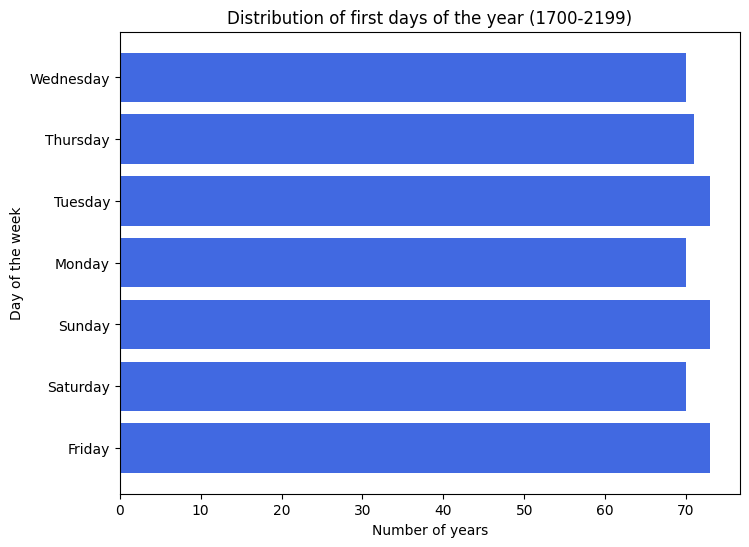

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

# Calculate the first day of each year from 1700 to 2199
first_days = []
for year in range(1700, 2200):
    day = day_of_week(1, 1, year)
    first_days.append(day)

# Count occurrences of each day
day_counts = Counter(first_days)

# Prepare data for plotting
days = list(day_counts.keys())
counts = list(day_counts.values())

# Create horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(days, counts, color="royalblue")
plt.xlabel("Number of years")
plt.ylabel("Day of the week")
plt.title("Distribution of first days of the year (1700-2199)")

# Save the plot as a file
plt.savefig("days_starting_year_distribution.png")
plt.show()

In [40]:
import pandas as pd

def save_calendar(year):
    days_per_month = {
        "January": 31,
        "February": 28,
        "March": 31,
        "April": 30,
        "May": 31,
        "June": 30,
        "July": 31,
        "August": 31,
        "September": 30,
        "October": 31,
        "November": 30,
        "December": 31
    }

    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        days_per_month["February"] += 1

    calendar_2022 = {
        "Day": [],
        "Month": [],
        "Year": [],
        "Day of week": []
    }

    for month_int, month_string in zip(range(1, 13), days_per_month):
        for day in range(1, days_per_month[month_string] + 1):
            calendar_2022["Day"].append(day)
            calendar_2022["Month"].append(month_string)
            calendar_2022["Year"].append(year)
            calendar_2022["Day of week"].append(day_of_week(day, month_int, year))

    calendar_2022 = pd.DataFrame(calendar_2022)
    calendar_2022.to_csv(f"days_{year}.csv", index=False)

save_calendar(2022)

In [41]:
import langchain  # env export test

print(day_of_week(7, 6, 1987))

Sunday
